## Comparison between AutoMS and MSPD

Here, we compare AutoMS with MSPD with the evaluating data. ROIs extracted with HPIC are processed by AutoMS and MSPD respectively. First, we display the scatter plot between AutoMS scores MSPD SNRs. Second, we display the profiles which were given conflicting predition.

### Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from AutoMS import hpic
from AutoMS import peakeval

### ROI extraction with HPIC

In [2]:
file = 'data/600mix_pos.mzML'
peaks, pics = hpic.hpic(file, min_intensity=500, min_snr=1, mass_inv=1, rt_inv=30)

### Peak evaluation with MSPD and AutoMS

In [3]:
scores, mspd_snrs, cnn_output, X, X_rebuild, dist_eval = peakeval.evaluate_peaks(peaks, pics, cal_snr=True, use_cnn=False)

100%|███████████████████████████████████████████████████████████████████████████| 25257/25257 [01:38<00:00, 257.56it/s]


790/790 [==============================] - 3s 1ms/step


Here, we display the scatter plot between AutoMS scores SNR values given by MSPD. Too narrow peaks were removed as they took up a major part and will mess up the visulation.Their scores are usually less than 0.

In [4]:
k = scores > 0
m = mspd_snrs > 0

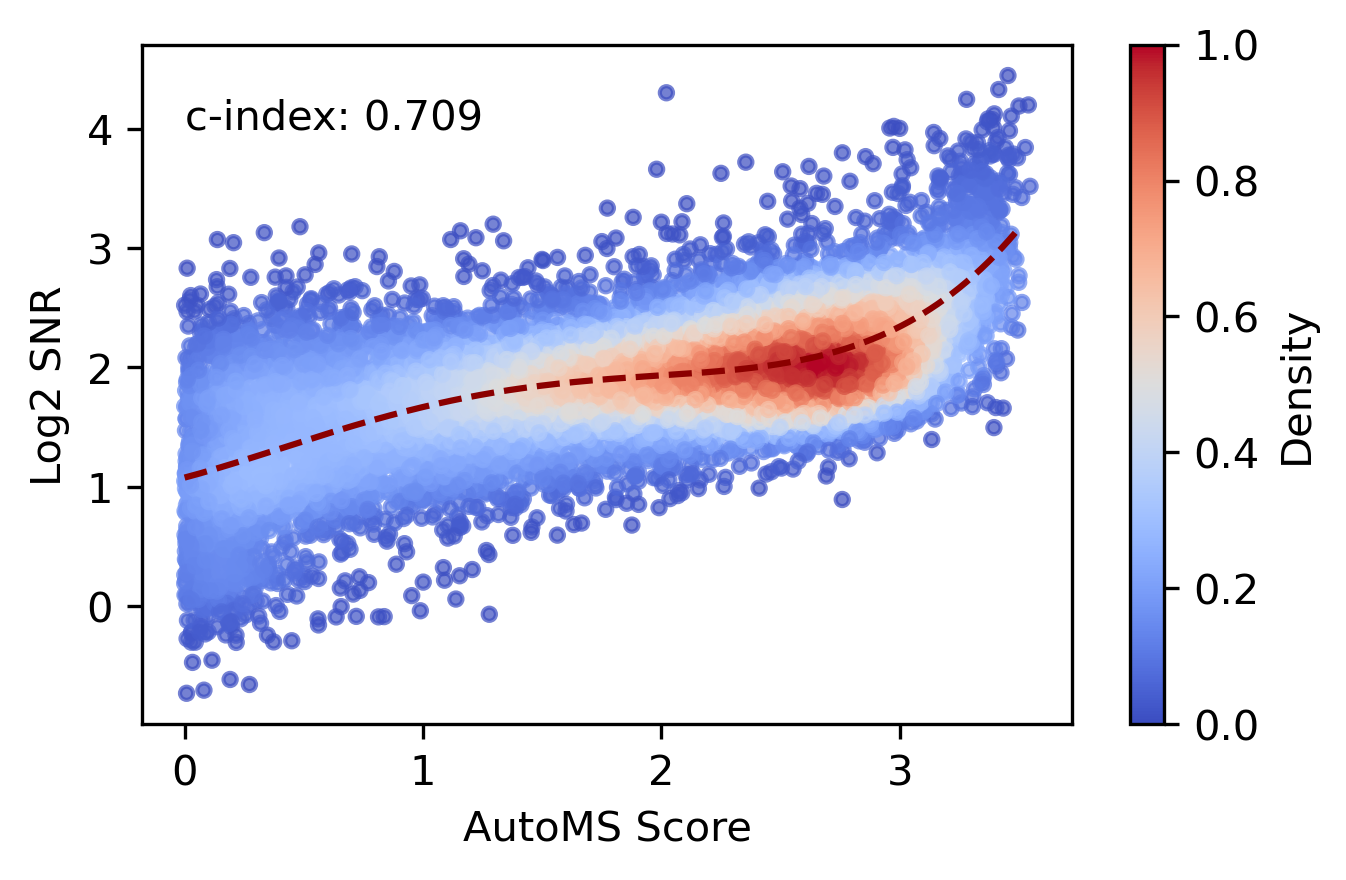

In [5]:
# compare AutoMS and MSPD
from scipy.stats import gaussian_kde
from matplotlib import cm
from lifelines.utils import concordance_index

x_plt = scores[np.logical_and(k, m)]
y_plt = mspd_snrs[np.logical_and(k, m)]
y_plt = np.log2(y_plt)

c_index = np.round(concordance_index(x_plt, y_plt), 3)

z = np.polyfit(x_plt, y_plt, 4)
p_plt = np.polyval(z, np.arange(0, 3.5, 0.01))

xy = np.vstack([x_plt,y_plt])
z_plt= gaussian_kde(xy)(xy)

fig, ax = plt.subplots(dpi = 300, figsize=(5, 3))
ax.scatter(x_plt, y_plt, c=z_plt, s=10, cmap = 'coolwarm', alpha = 0.7)
cbar = fig.colorbar(cm.ScalarMappable(cmap = 'coolwarm'))
cbar.ax.set_ylabel('Density')
ax.plot(np.arange(0, 3.5, 0.01), p_plt, linestyle = '--', color = 'darkred')
plt.text(0, 4.0, 'c-index: {}'.format(c_index))
plt.xlabel('AutoMS Score')
plt.ylabel('Log2 SNR')
plt.show()

Here, we display the peak profiles with conflicting predictions.First, find peaks with low SNRs of MSPD, but given high scores by AutoMS.

In [6]:
temp1 =  np.where(np.logical_and(scores > 2, np.logical_and(mspd_snrs < 2, mspd_snrs > 1)))
len(temp1[0])

7

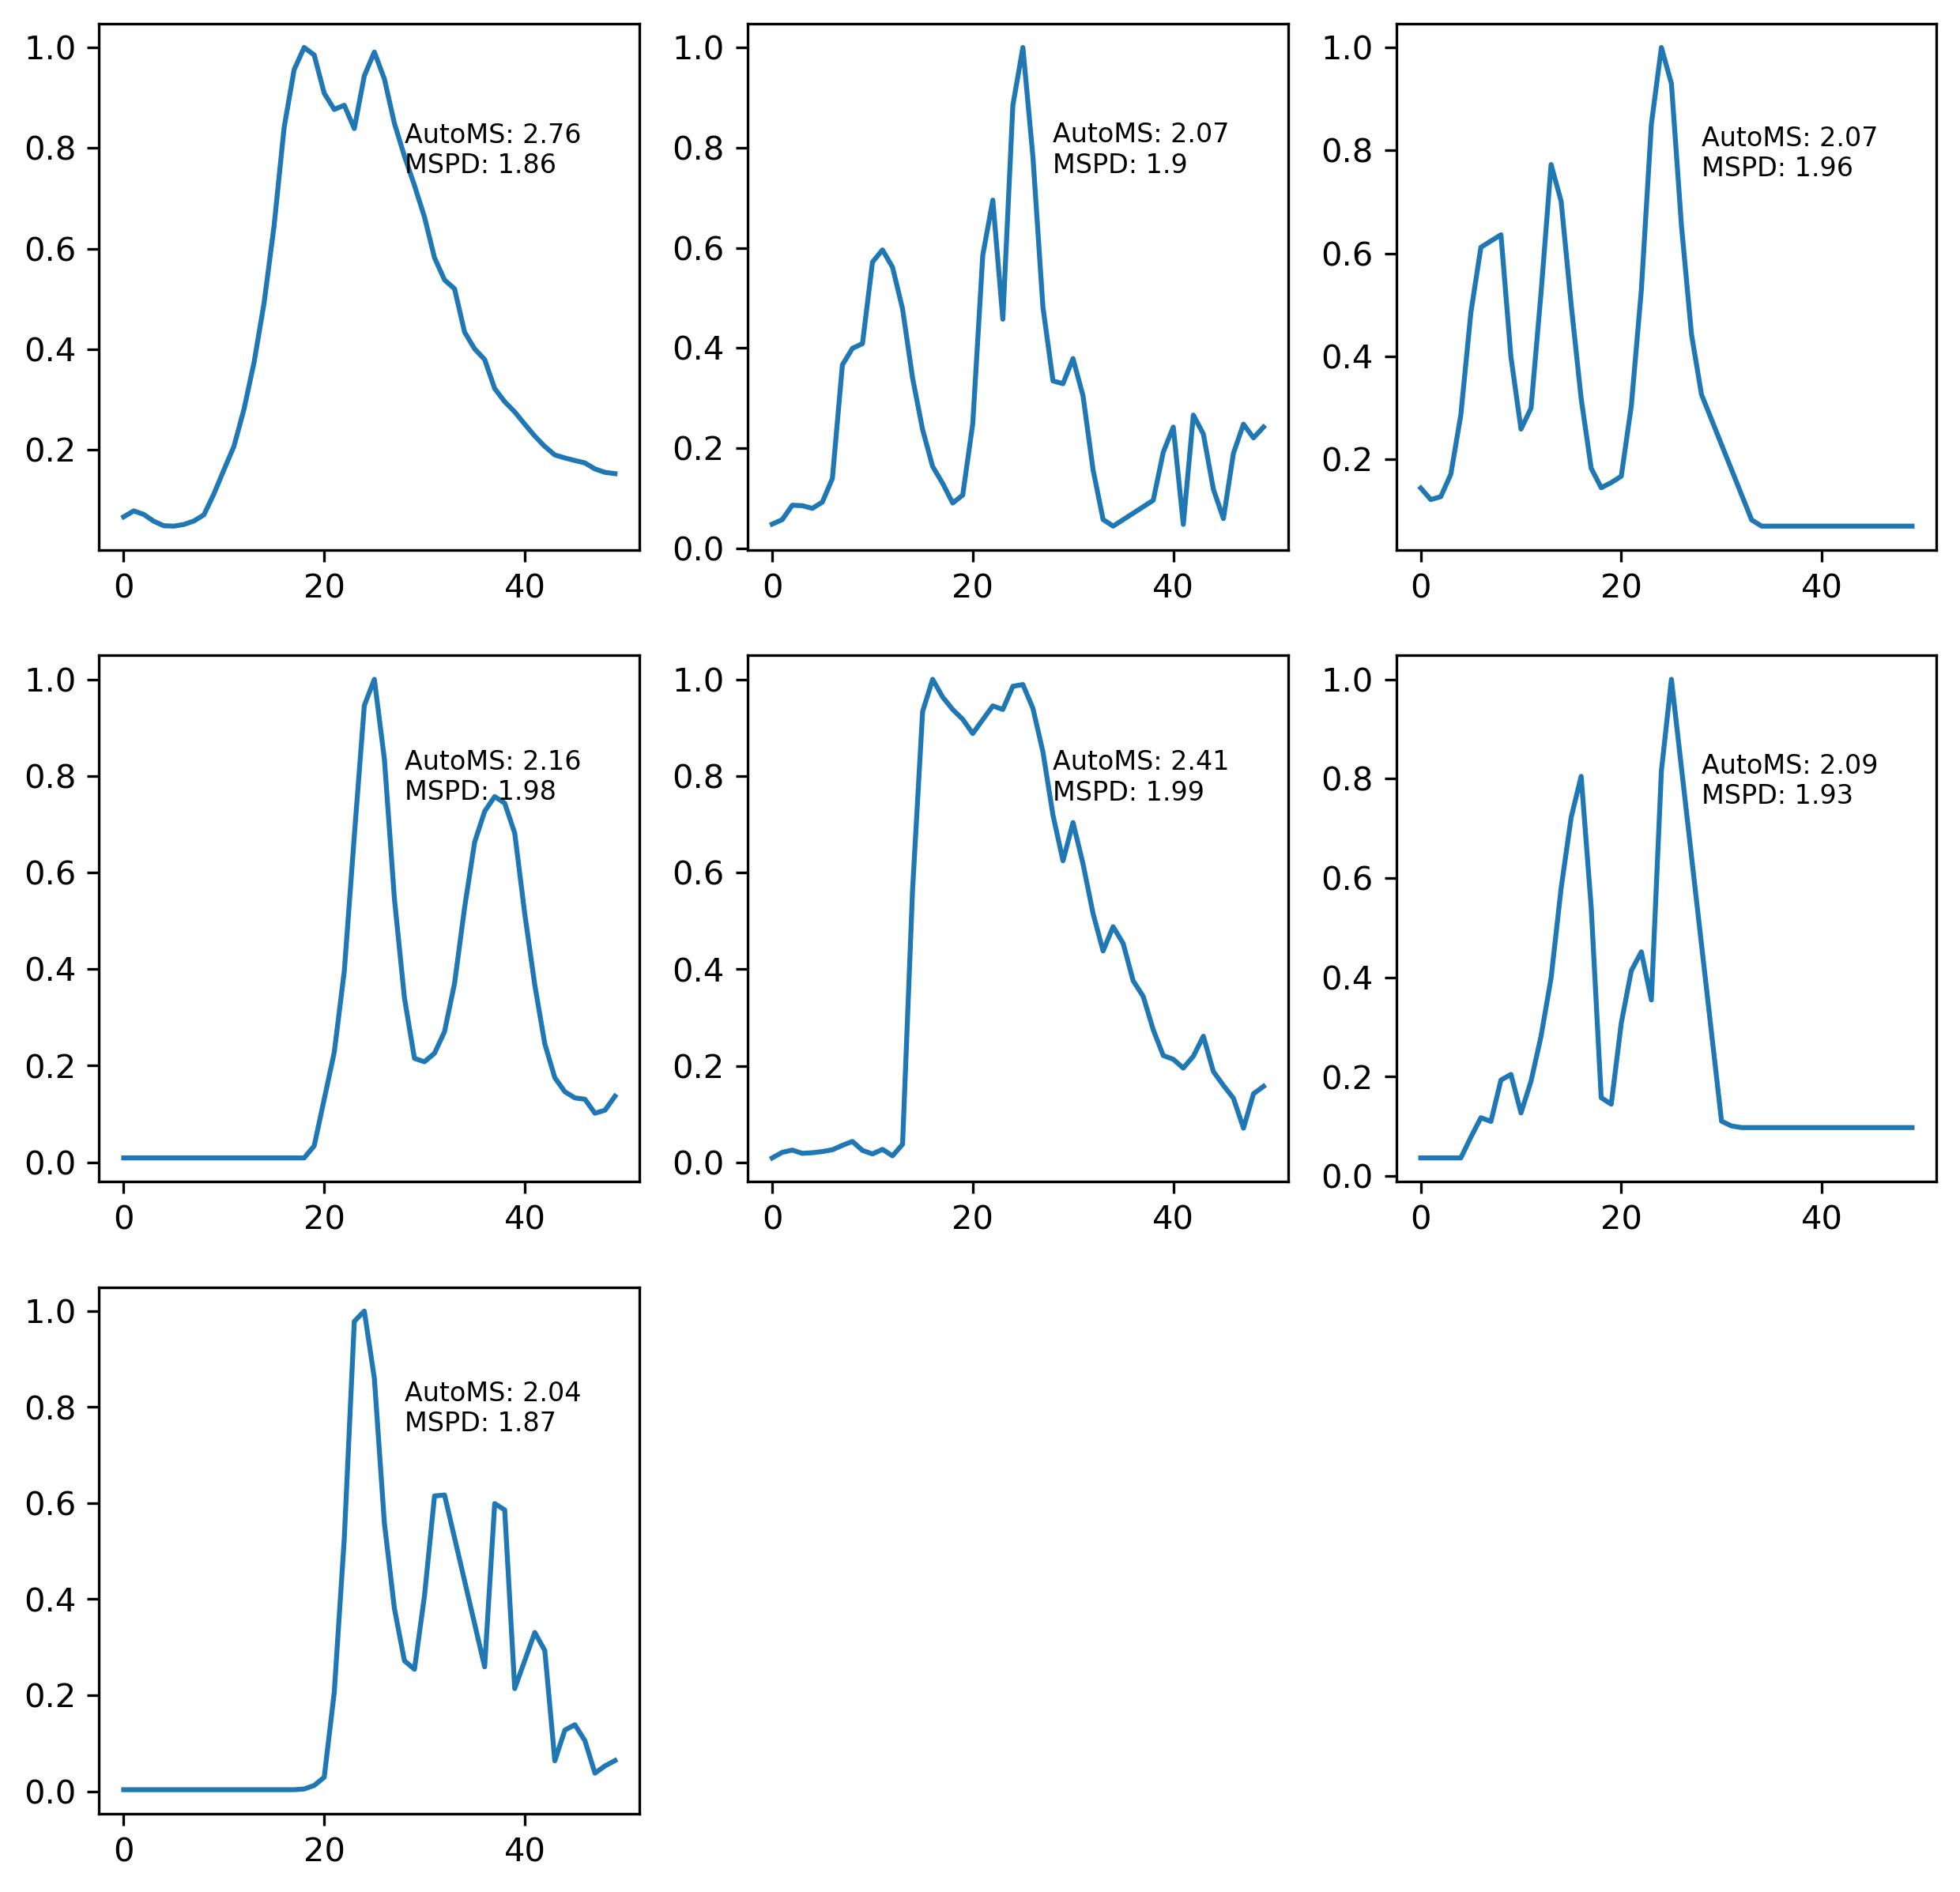

In [7]:
plt.figure(dpi = 300, figsize = (10,10))
for i,j in enumerate(temp1[0]):
    plt.subplot(3,3,i+1)
    plt.plot(X[j,:])
    plt.text(28, 0.75, 'AutoMS: {} \nMSPD: {}'.format(np.round(scores[j], 2), np.round(mspd_snrs[j], 2)), fontsize = 8)

Then,find peaks with high SNRs of MSPD, but given low scores by AutoMS.

In [8]:
temp2 = np.where(np.logical_and(np.logical_and(scores < 0.3, scores > 0.01), mspd_snrs > 5))
len(temp2[0])

30

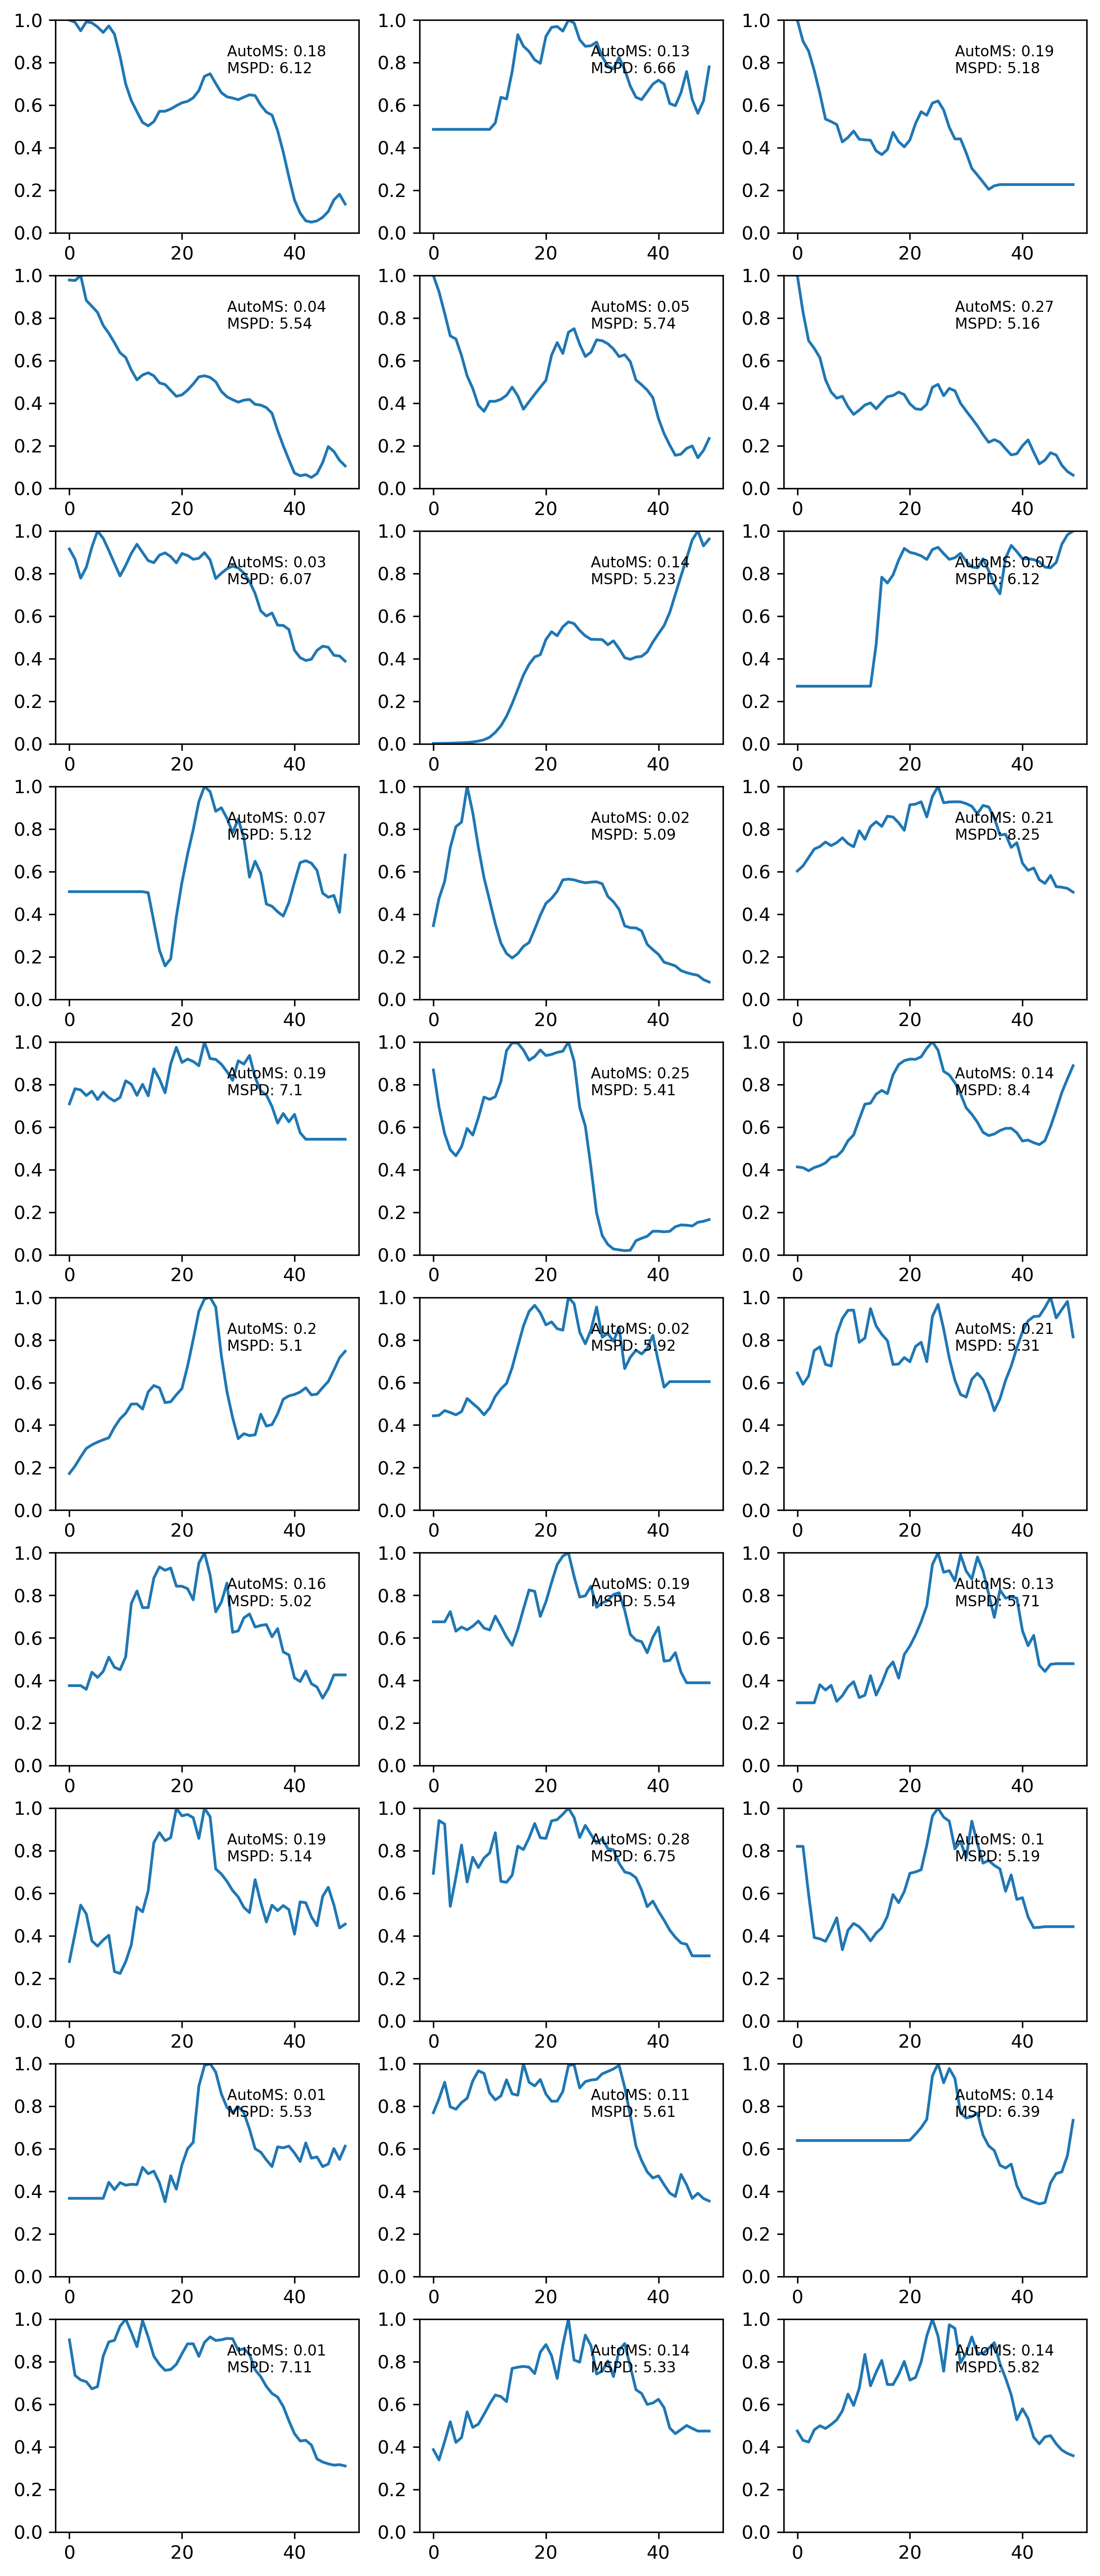

In [9]:
plt.figure(dpi = 300, figsize = (10,25))
for i,j in enumerate(temp2[0]):
    plt.subplot(10,3,i+1)
    plt.plot(X[j,:])
    plt.ylim(0, 1)
    plt.text(28, 0.75, 'AutoMS: {} \nMSPD: {}'.format(np.round(scores[j], 2), np.round(mspd_snrs[j], 2)), fontsize = 8)